In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
%matplotlib inline

In [2]:
table = pd.read_csv('/Users/cynthia/Downloads/Train_2/train_u6lujuX_CVtuZ9i (1).csv')
table.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


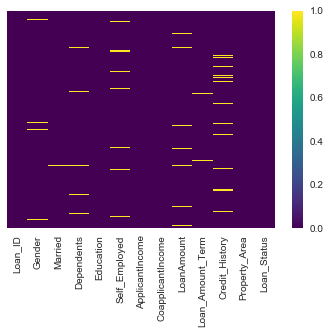

In [3]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

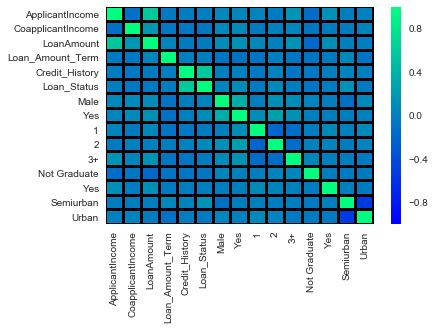

In [72]:
table_corr = table.corr()
sns.heatmap(table_corr, cmap = 'winter', linecolor='black', linewidths=2)

In [99]:
table_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
ApplicantIncome,1.000000,-0.116233,0.568018,-0.044393,-0.018785,-0.009766,0.059732,0.047424,0.037401,-0.037605,0.157964,-0.136567,0.128940,-0.018258,0.002362
CoapplicantIncome,-0.116233,1.000000,0.185525,-0.060044,-0.062296,-0.064902,0.077239,0.070525,-0.032762,0.007635,0.043866,-0.067183,-0.018035,-0.027463,0.034148
LoanAmount,0.568018,0.185525,1.000000,0.041467,-0.034888,-0.038924,0.106139,0.143556,0.062784,0.015551,0.151709,-0.175346,0.128115,-0.004616,-0.029982
Loan_Amount_Term,-0.044393,-0.060044,0.041467,1.000000,0.009608,-0.012268,-0.087732,-0.107812,-0.086776,-0.005640,-0.077616,-0.083236,-0.034544,0.062777,-0.101429
Credit_History,-0.018785,-0.062296,-0.034888,0.009608,1.000000,0.572445,-0.005640,0.013064,-0.041364,0.021012,-0.071435,-0.054725,-0.010100,0.028485,-0.008130
Loan_Status,-0.009766,-0.064902,-0.038924,-0.012268,0.572445,1.000000,0.023451,0.095806,-0.038943,0.058999,-0.021737,-0.071649,-0.007948,0.137764,-0.041624
Male,0.059732,0.077239,0.106139,-0.087732,-0.005640,0.023451,1.000000,0.354561,-0.008573,0.132282,0.095920,0.048084,-0.009215,-0.121239,0.057049
Yes,0.047424,0.070525,0.143556,-0.107812,0.013064,0.095806,0.354561,1.000000,0.115337,0.257606,0.133436,0.010237,-0.005227,-0.004952,0.011105
1,0.037401,-0.032762,0.062784,-0.086776,-0.041364,-0.038943,-0.008573,0.115337,1.000000,-0.208247,-0.139377,-0.004115,0.084458,0.011335,0.073537
2,-0.037605,0.007635,0.015551,-0.005640,0.021012,0.058999,0.132282,0.257606,-0.208247,1.000000,-0.139377,0.029071,0.031539,-0.016535,0.025140


In [5]:
table.Gender.fillna('Male', inplace = True)
table[table['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [6]:
table.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
table[table['Gender'].isnull()].index

Int64Index([], dtype='int64')

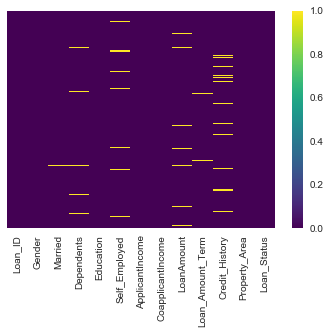

In [8]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [9]:
table[table['Married'].isnull()].index

Int64Index([104, 228, 435], dtype='int64')

In [10]:
table.drop([104, 228, 435], inplace = True)

In [11]:
table[table['Married'].isnull()].index

Int64Index([], dtype='int64')

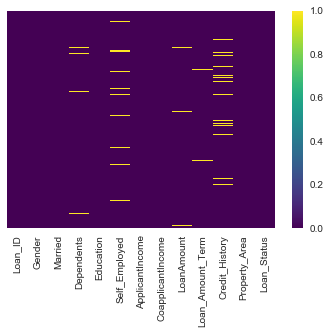

In [12]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [13]:
table['Loan_Status'] = table['Loan_Status'].map(lambda x: 1 if x=='Y' else 0)

In [14]:
table['Credit_History'].fillna(table['Loan_Status'], inplace = True)

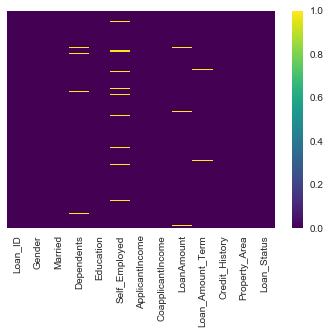

In [15]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [16]:
table.Self_Employed.fillna('No', inplace = True)
table[table['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [17]:
data = table.pivot_table(index = ['Education','Self_Employed'], values = ['LoanAmount'], aggfunc=np.mean)
data.loc['Graduate','No']

LoanAmount    149.678304
Name: (Graduate, No), dtype: float64

In [18]:
def fill(x):
    if pd.isnull(x['LoanAmount']):
        return data.loc[x['Education'], x['Self_Employed']]
    else:
        return x['LoanAmount']

In [19]:
table['LoanAmount'] = table.apply(lambda x : fill(x),axis=1)

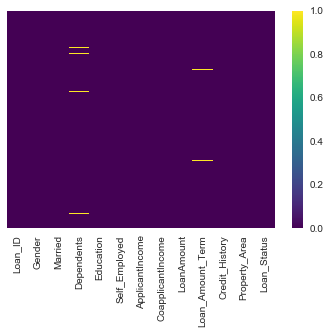

In [20]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [21]:
table.dropna(inplace = True)

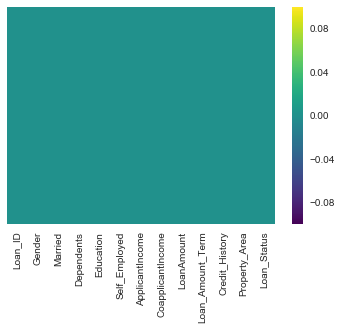

In [22]:
sns.heatmap(table.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [23]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              586 non-null object
Gender               586 non-null object
Married              586 non-null object
Dependents           586 non-null object
Education            586 non-null object
Self_Employed        586 non-null object
ApplicantIncome      586 non-null int64
CoapplicantIncome    586 non-null float64
LoanAmount           586 non-null float64
Loan_Amount_Term     586 non-null float64
Credit_History       586 non-null float64
Property_Area        586 non-null object
Loan_Status          586 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 64.1+ KB


In [24]:
table.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,149.678304,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [25]:
table['Self_Employed'].replace(to_replace='yes', value='y1', inplace=True)
table['Self_Employed'].replace(to_replace='no', value='n1', inplace=True)

In [26]:
gender = pd.get_dummies(table['Gender'], drop_first=True)
married = pd.get_dummies(table['Married'], drop_first=True)
dependents = pd.get_dummies(table['Dependents'], drop_first=True)
education = pd.get_dummies(table['Education'], drop_first=True)
self_employmed = pd.get_dummies(table['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(table['Property_Area'], drop_first= True)


In [27]:
table.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
table.drop(['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'], axis = 1, inplace = True)

In [29]:
table = pd.concat([table, gender, married, dependents, education, self_employmed, property_area], axis = 1)

In [30]:
table.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001002,5849,0.0,149.678304,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
from sklearn.model_selection import train_test_split

In [32]:
lgr = LogisticRegression()

In [33]:
table.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Male', 'Yes', '1',
       '2', '3+', 'Not Graduate', 'Yes', 'Semiurban', 'Urban'],
      dtype='object')

In [89]:
x = table[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History','Male', 'Yes', '1','2', '3+', 'Not Graduate', 'Yes', 'Semiurban', 'Urban']]
y= table['Loan_Status']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
predictions = lgr.predict(X_test)

In [97]:
print(confusion_matrix(y_test, predictions))

[[18 15]
 [ 1 84]]


In [36]:
test = pd.read_csv('/Users/cynthia/Downloads/test_Y3wMUE5_7gLdaTN (1).csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


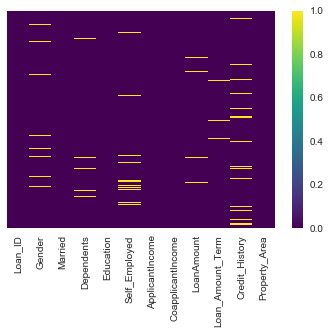

In [37]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [38]:
test.Gender.fillna('Male', inplace = True)
test[test['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


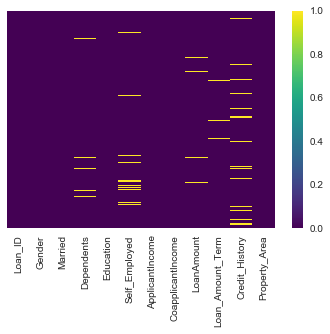

In [39]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

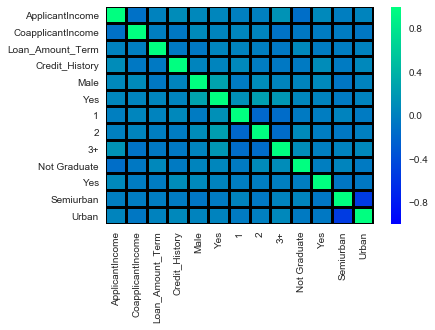

In [98]:
test_corr = test.corr()
sns.heatmap(test_corr, cmap = 'winter', linecolor='black', linewidths=2)

In [41]:
test.Credit_History.fillna(1.0, inplace = True)
test[test['Credit_History'].isnull()]        

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


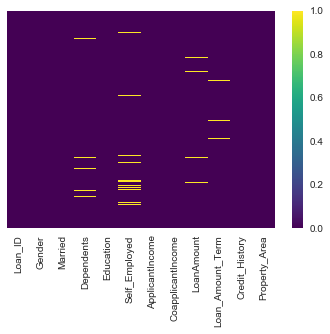

In [42]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [43]:
test.Self_Employed.fillna('No', inplace = True)
test[test['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


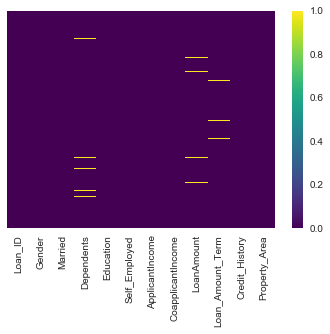

In [44]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [45]:
data1 = test.pivot_table(index = ['Education','Self_Employed'], values = ['LoanAmount'], aggfunc=np.mean)
data1.loc['Graduate','No']

LoanAmount    139.528
Name: (Graduate, No), dtype: float64

In [46]:
test['LoanAmount'] = test.apply(lambda x : fill(x),axis=1)

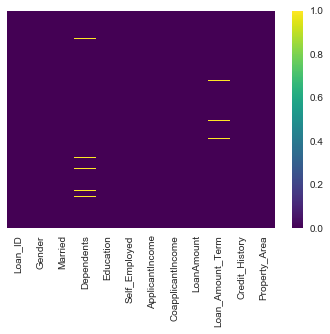

In [47]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

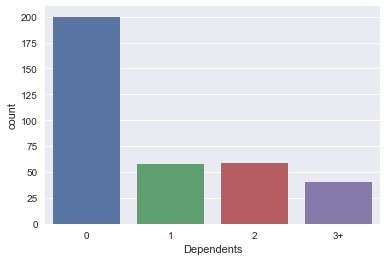

In [48]:
sns.countplot('Dependents', data = test)

In [49]:
test.Dependents.fillna('0', inplace = True)
test[test['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


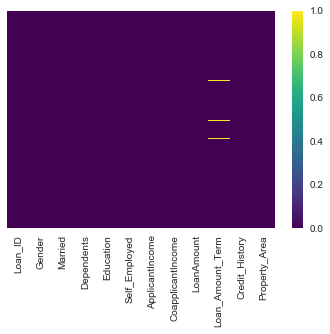

In [50]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

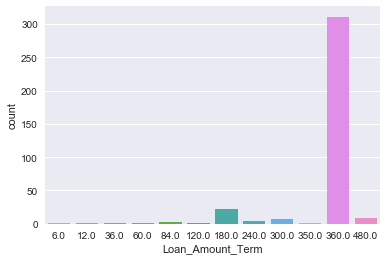

In [51]:
sns.countplot('Loan_Amount_Term', data = test)

In [52]:
test.Loan_Amount_Term.fillna(360, inplace = True)
test[test['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


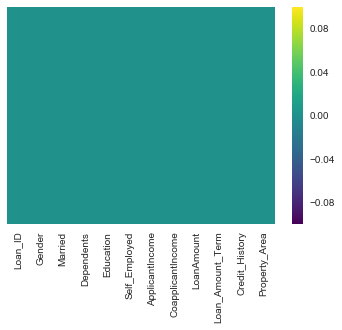

In [53]:
sns.heatmap(test.isnull(), cmap ='viridis',cbar = True, yticklabels=False)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null object
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 34.5+ KB


In [55]:
test['Self_Employed'].replace(to_replace='yes', value='y1', inplace=True)
test['Self_Employed'].replace(to_replace='no', value='n1', inplace=True)

In [56]:
Gender = pd.get_dummies(test['Gender'], drop_first=True)
Married = pd.get_dummies(test['Married'], drop_first=True)
Dependents = pd.get_dummies(test['Dependents'], drop_first=True)
Education = pd.get_dummies(test['Education'], drop_first=True)
Self_employmed = pd.get_dummies(test['Self_Employed'], drop_first=True)
Property_area = pd.get_dummies(test['Property_Area'], drop_first= True)


In [57]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [58]:
test.drop(['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'], axis = 1, inplace = True)

In [59]:
test = pd.concat([test, Gender, Married, Dependents, Education, Self_employmed, Property_area], axis = 1)

In [60]:
test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001015,5720,0,110,360.0,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126,360.0,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208,360.0,1.0,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100,360.0,1.0,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78,360.0,1.0,1,0,0,0,0,1,0,0,1


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
Loan_ID              367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null object
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Male                 367 non-null uint8
Yes                  367 non-null uint8
1                    367 non-null uint8
2                    367 non-null uint8
3+                   367 non-null uint8
Not Graduate         367 non-null uint8
Yes                  367 non-null uint8
Semiurban            367 non-null uint8
Urban                367 non-null uint8
dtypes: float64(2), int64(2), object(2), uint8(9)
memory usage: 20.5+ KB


In [62]:
test.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Male', 'Yes', '1', '2', '3+',
       'Not Graduate', 'Yes', 'Semiurban', 'Urban'],
      dtype='object')

In [63]:
X = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Male', 'Yes', '1', '2', '3+','Not Graduate', 'Yes', 'Semiurban', 'Urban']]

In [64]:
pred = lgr.predict(X)

In [65]:
pred.tolist()
pred_new = []
for x in pred:
    if x==1:
        pred_new.append('Y')
    else:
        pred_new.append('N')
print(pred_new)

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',

In [66]:
pred_df = pd.DataFrame(pred_new, columns=['A'])

In [67]:
pred_df.head()

,A
0,Y
1,Y
2,Y
3,Y
4,Y


In [71]:
pred_df.to_excel('/Users/cynthia/Desktop/Workbook1.xlsx', header=False, index=False)

In [69]:
|

SyntaxError: invalid syntax (<ipython-input-69-6f719179e65e>, line 1)